<a href="https://colab.research.google.com/github/Rubnserrano/TF-Certification/blob/main/02_curso_tf_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Create a classification dataset using Scikit-Learn's make_moons() function, visualize it and then build a model to fit it at over 85% accuracy.

In [284]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.metrics import confusion_matrix

In [285]:
X, y = make_moons(n_samples = 100, random_state=42)

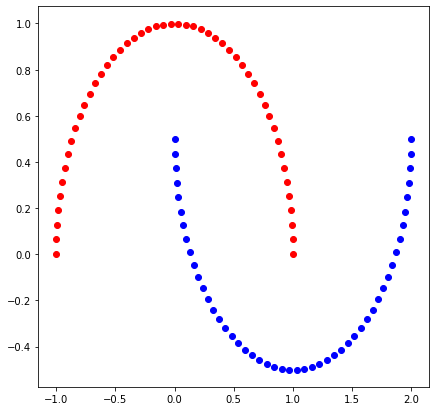

In [286]:
plt.figure(figsize=(7, 7))
plt.scatter(
    X[y == 0, 0],
    X[y == 0, 1],
    color="red",
)
plt.scatter(
    X[y == 1, 0],
    X[y == 1, 1],
    color="blue",
)

In [287]:
df_moons = pd.DataFrame({'col_1' : X[:,0],
                         'col_2' : X[:,1],
                         'y': y})
df_moons

,col_1,col_2,y
0,1.518393,-0.355143,1
1,0.018441,0.308841,1
2,0.715472,-0.458668,1
3,-0.967295,0.253655,0
4,-0.949056,0.315108,0
...,...,...,...
95,0.198586,-0.098111,1
96,0.777479,-0.474928,1
97,0.623490,0.781831,0
98,1.900969,0.066116,1


In [288]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


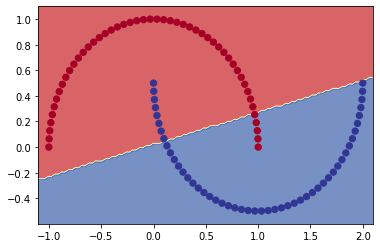

In [289]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = 'adam',
              metrics = ['mae'])

history = model.fit(X,y, epochs=100,verbose=0)
plot_decision_boundary(model, X, y)

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
4/4 [==============================] - 0s 3ms/step - loss: 0.2240 - accuracy: 0.9000


[0.22402915358543396, 0.8999999761581421]

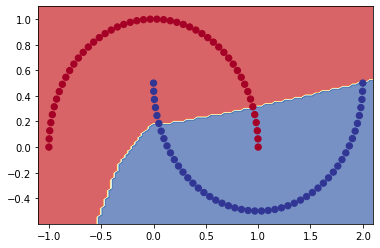

In [290]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model2.compile(loss = tf.keras.losses.binary_crossentropy,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics = ['accuracy'])

history2 = model2.fit(X,y, epochs=15, verbose=0)
plot_decision_boundary(model2, X, y)
model2.evaluate(X,y)

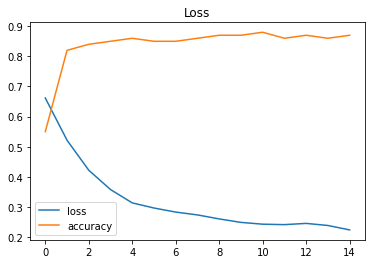

In [291]:
pd.DataFrame(history2.history).plot(title='Loss')


#Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.

In [292]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [293]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)
#string not callable solution problem

In [294]:
class_names = ['t-shirt/top', 'trousers', 'pullover', 'dress', 'coat', 'sandal', 'shirt', ' sneaker', 'bag', 'ankle_boot']
import random
def random_img(data, labels, classes):
  plt.figure(figsize=(7, 7))
  rand_index = random.randint(0, len(data))
  plt.imshow(train_data[rand_index], cmap = 'binary')
  plt.title(f'Image label: {classes[labels[rand_index]]}')
  plt.show()


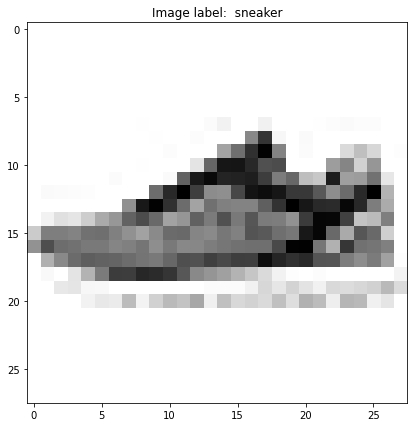

In [295]:
random_img(train_data, train_labels, class_names)

In [296]:
train_data = train_data / 255.0
test_data = test_data / 255.0

In [297]:
tf.random.set_seed(42)
model_fashion = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(48, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax'),
    
])
model_fashion.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                      optimizer = tf.keras.optimizers.Adam(learning_rate = 0.002),
                      metrics = ['accuracy'])
history_fashion = model_fashion.fit(train_data, train_labels, epochs=20, validation_data = (test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 13s 6ms/step - loss: 0.5088 - accuracy: 0.8192 - val_loss: 0.4159 - val_accuracy: 0.8515
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3864 - accuracy: 0.8593 - val_loss: 0.4546 - val_accuracy: 0.8442
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3538 - accuracy: 0.8709 - val_loss: 0.4191 - val_accuracy: 0.8450
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3335 - accuracy: 0.8780 - val_loss: 0.3885 - val_accuracy: 0.8586
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3178 - accuracy: 0.8818 - val_loss: 0.3827 - val_accuracy: 0.8623
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3035 - accuracy: 0.8875 - val_loss: 0.3961 - val_accuracy: 0.8559
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2975 - accuracy: 0.8903 - val_loss: 0.3821 - val_accuracy

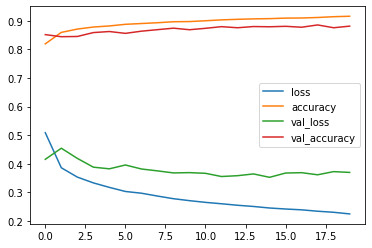

In [298]:
pd.DataFrame(history_fashion.history).plot()


In [299]:
preds = model_fashion.predict(test_data).argmax(axis=1)
preds
confusion_matrix(test_labels, preds)

313/313 [==============================] - 1s 1ms/step


array([[843,   2,  13,  36,   6,   0,  93,   0,   7,   0],
       [  2, 958,   5,  24,   9,   0,   1,   0,   1,   0],
       [ 16,   1, 758,  11, 148,   0,  65,   0,   1,   0],
       [ 17,   9,  11, 895,  51,   0,  17,   0,   0,   0],
       [  1,   0,  59,  20, 885,   0,  35,   0,   0,   0],
       [  0,   0,   0,   0,   0, 947,   0,  29,   1,  23],
       [114,   3,  77,  33, 114,   0, 652,   0,   7,   0],
       [  0,   0,   0,   0,   0,  11,   0, 972,   0,  17],
       [  4,   0,   2,   4,  14,   3,  12,   2, 959,   0],
       [  0,   0,   0,   0,   0,   8,   1,  49,   0, 942]])

#Recreate TensorFlow's softmax activation function in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.

In [300]:
def softmax(x):
  x = tf.cast(x, dtype = tf.float32)
  e_x = tf.math.exp(x - tf.math.reduce_max(x))
  return e_x / tf.math.reduce_sum(e_x, axis=0)

tensor = tf.constant([[1,2,3,6],
                     [2,4,5,6]])

print(softmax(tensor))

tf.Tensor(
[[0.2689414  0.11920293 0.11920293 0.5       ]
 [0.7310586  0.880797   0.8807971  0.5       ]], shape=(2, 4), dtype=float32)


#Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediction labels at the same time. Hint: see the classification tutorial in the TensorFlow documentation for ideas.

In [301]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)
#string not callable solution problem

In [302]:
model_fashion.evaluate(test_data, preds)

313/313 [==============================] - 1s 2ms/step - loss: 0.1041 - accuracy: 1.0000


[0.10414517670869827, 1.0]

ankle_boot


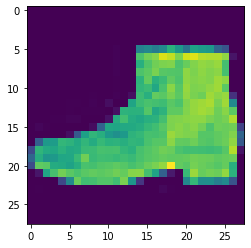

In [303]:
print(class_names[test_labels[7341]])
plt.imshow(test_data[7341])

4004
1/1 [==============================] - 0s 55ms/step


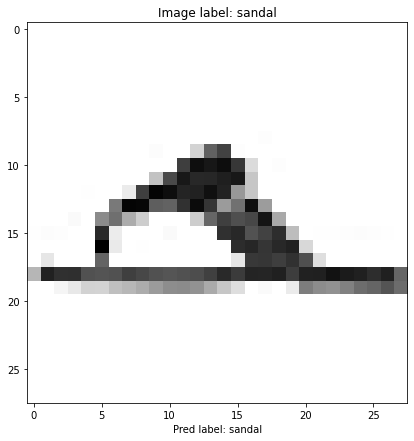

In [304]:
from pandas.core.dtypes.common import classes_and_not_datetimelike
def view_preds(model, images, labels, classes):
  plt.figure(figsize=(7, 7))
  rand_index = random.randint(0, len(images))
  print(rand_index)
  plt.imshow(images[rand_index], cmap = 'binary')
  plt.title(f'Image label: {classes[labels[rand_index]]}')
  plt.xlabel(f'Pred label: {classes[model.predict(images[rand_index]).argmax()]}')
  plt.show()
view_preds(model_fashion, test_data, test_labels, class_names)

[3602, 1518, 4802, 3540]
1/1 [==============================] - 0s 27ms/step


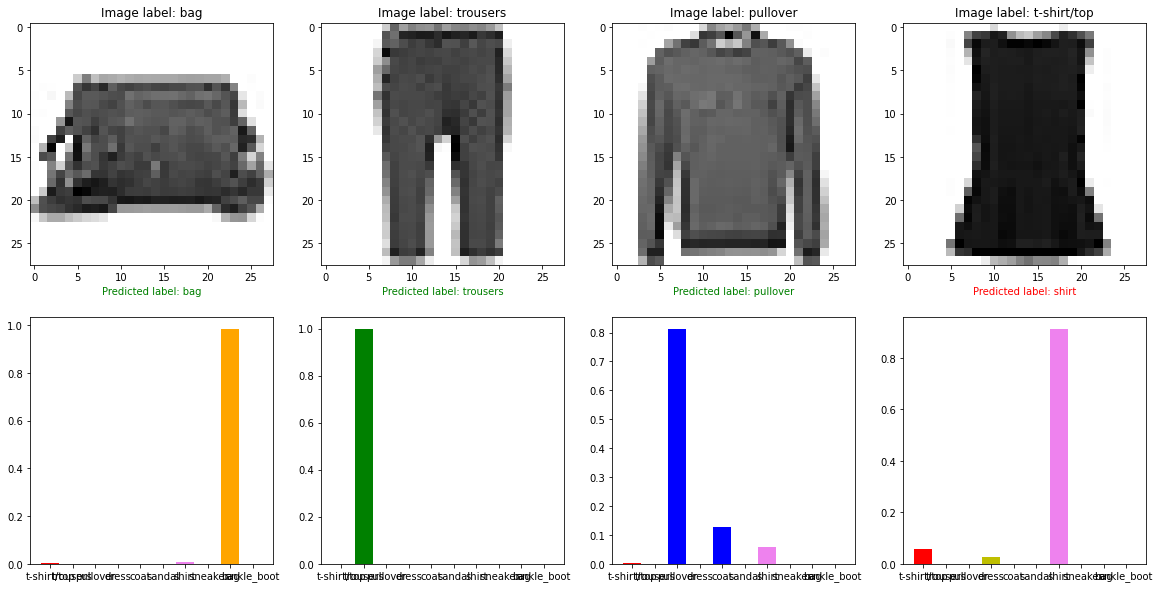

In [417]:

def view_preds(n,model, images, labels, classes):
  r_indexes=[]
  for i in range(n): r_indexes.append(random.randint(0,len(images)))
  print(r_indexes)
  # rand_index = random.randint(0, len(images))
  plt.figure(figsize=(20,10))
  for j in range(n):
    plt.subplot(2,n,j+1)
    plt.imshow(images[r_indexes[j]], cmap = 'binary')
    plt.title(f'Image label: {classes[labels[r_indexes[j]]]}')
    if (model.predict(images[r_indexes[j]]).argmax() == labels[r_indexes[j]]):
      plt.xlabel(f'Predicted label: {classes[model.predict(images[r_indexes[j]]).argmax()]}', color='g')
    else: plt.xlabel(f'Predicted label: {classes[model.predict(images[r_indexes[j]]).argmax()]}', color='r')

    plt.subplot(2,n,j+n+1)
    plt.bar(classes, tf.squeeze(tf.constant(model.predict(images[r_indexes[j]]))), color=['r','g','b','y','b','salmon','violet','c','orange','gold'])
plt.show()

view_preds(4, model_fashion, test_data, test_labels, class_names)

#Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the T-shirt class with their predictions.

In [520]:
class_names = ['t-shirt/top', 'trousers', 'pullover', 'dress', 'coat', 'sandal', 'shirt', ' sneaker', 'bag', 'ankle_boot']

def last_ex(n=3, model=model_fashion, images=test_data, labels=test_labels, classes=class_names):
  r_class = random.randint(1,10)
  print(f'Choosing random class: {r_class}-> {classes[r_class-1]}')
  # r_indexes = random()
  df = pd.DataFrame(labels)
  indices = df.index[df[0]==r_class-1].tolist()
  indices = random.sample(indices, n)
  
  plt.figure(figsize=(20,10))
  for j in range(n):
    plt.subplot(2,n,j+1)
    plt.imshow(images[indices[j]], cmap = 'binary')
    plt.title(f'Image label: {classes[labels[indices[j]]]}')
    if (model.predict(images[indices[j]]).argmax() == labels[indices[j]]):
      plt.xlabel(f'Predicted label: {classes[model.predict(images[indices[j]]).argmax()]}', color='g')
    else: plt.xlabel(f'Predicted label: {classes[model.predict(images[indices[j]]).argmax()]}', color='r')

    plt.subplot(2,n,j+n+1)
    plt.bar(classes, tf.squeeze(tf.constant(model.predict(images[indices[j]]))), color=['r','g','b','y','b','salmon','violet','c','orange','gold'])
plt.show()


Choosing random class: 2-> trousers
1/1 [==============================] - 0s 36ms/step


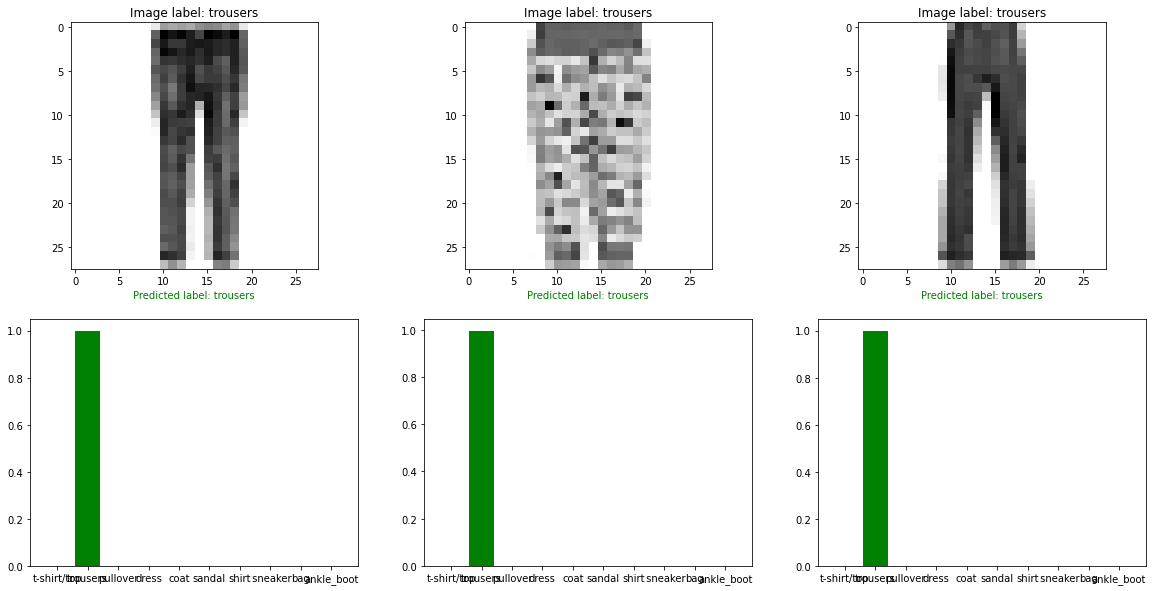

In [523]:
last_ex(3)